In [1]:
from datasets import load_dataset, load_metric
import pandas as pd
from datasets import Dataset, DatasetDict
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


# EDA for cfilt/iitb-english-hindi

## Load the Dataset

In [2]:
dataset = load_dataset('cfilt/iitb-english-hindi', split='train[:30000]')

Generating train split:   0%|          | 0/1659083 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/520 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2507 [00:00<?, ? examples/s]

In [6]:
dataset

Dataset({
    features: ['translation'],
    num_rows: 30000
})

In [5]:
dataset['translation'][0]

{'en': 'Give your application an accessibility workout',
 'hi': 'अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें'}

In [17]:
hindi_df = Dataset.from_list(dataset['translation']).to_pandas()

In [18]:
hindi_df.head()

,en,hi
0,Give your application an accessibility workout,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें
1,Accerciser Accessibility Explorer,एक्सेर्साइसर पहुंचनीयता अन्वेषक
2,The default plugin layout for the bottom panel,निचले पटल के लिए डिफोल्ट प्लग-इन खाका
3,The default plugin layout for the top panel,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका
4,A list of plugins that are disabled by default,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...


## Check Unique and Null Values

In [19]:
hindi_df.describe()

,en,hi
count,30000,30000
unique,6093,5007
top,_ Help,संपादक
freq,39,62


In [20]:
print(hindi_df.isnull().sum())


en    0
hi    0
dtype: int64


## Plot Sentence Lengths

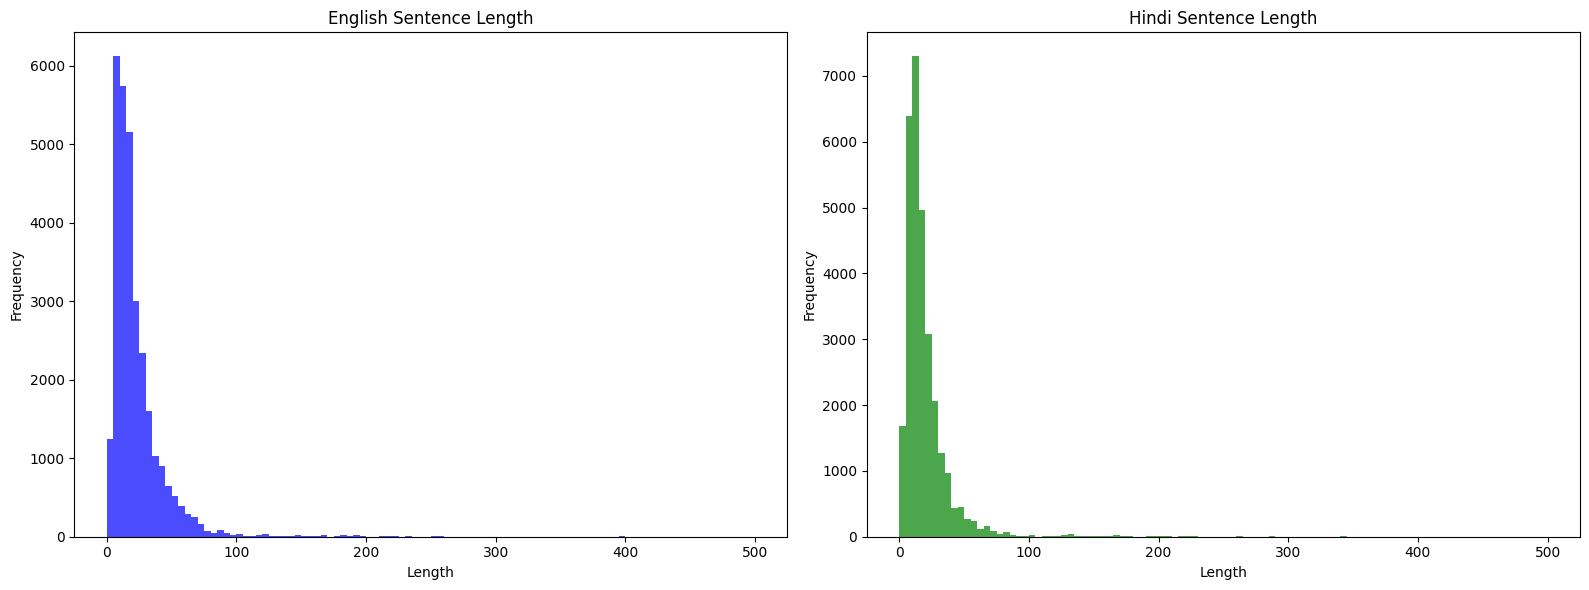

In [22]:
hindi_df['en_length'] = hindi_df['en'].apply(len)
hindi_df['hi_length'] = hindi_df['hi'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(hindi_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(hindi_df['hi_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Hindi Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Hindi Sentence Lengths

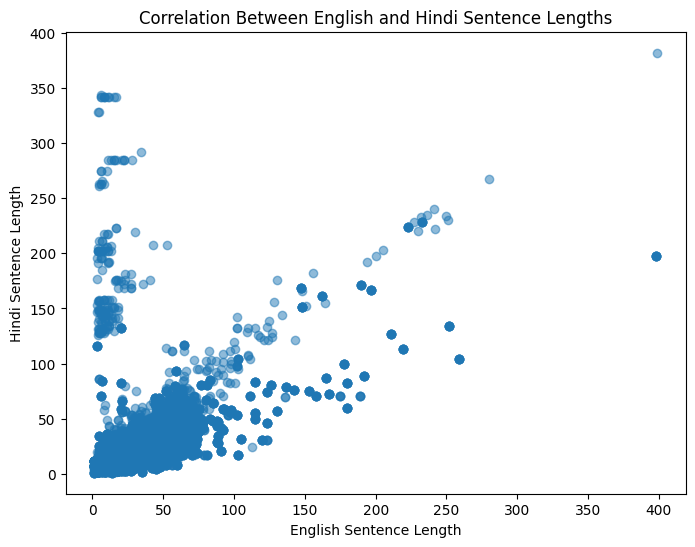

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(hindi_df['en_length'], hindi_df['hi_length'], alpha=0.5)
plt.title('Correlation Between English and Hindi Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Hindi Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [26]:
import pandas as pd

from collections import Counter

en_words = ' '.join(hindi_df['en']).split()
hi_words = ' '.join(hindi_df['hi']).split()

en_word_freq = Counter(en_words)
hi_word_freq = Counter(hi_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
hi_common_words = hi_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
hi_df = pd.DataFrame(hi_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Hindi Words:")
print(hi_df)


Most Common English Words:
   Word  Frequency
0   the       4745
1     _       3256
2    to       2866
3    of       2482
4     a       2004
5  file       1214
6     s       1168
7   for       1007
8    in       1004
9   not        830

Most Common Hindi Words:
    Word  Frequency
0     को       3132
1     के       2261
2   करें       2078
3     का       2035
4  फ़ाइल       1909
5   नहीं       1788
6     (_       1565
7     है       1540
8      a       1323
9    में       1191


## Size of the Vocabulary

In [27]:
en_vocab_size = len(set(' '.join(hindi_df['en']).split()))
hi_vocab_size = len(set(' '.join(hindi_df['hi']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Tamil Vocabulary Size: {hi_vocab_size}')


English Vocabulary Size: 4933
Tamil Vocabulary Size: 4191


## Check Duplicate Rows

In [30]:
duplicate_rows = hindi_df[hindi_df.duplicated(['en', 'hi'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 22617
